In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\zaida\OneDrive\Desktop\Machine Learning\in-vehicle-coupon-recommendation.csv")

In [3]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [4]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
df.drop("car",axis=1,inplace=True) # Extreame Missing Values

In [8]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [9]:
for i in ["Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]:
    freq=df[i].value_counts(dropna=False)
    print(freq)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: count, dtype: int64


In [10]:
for i in ["Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]:
    df[i]=df[i].fillna(df[i].value_counts().idxmax())

In [11]:
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

### Visualization

In [12]:
# Frequency Counts of pie of y , grnder , destination , coupon , expiration , income 
# Cross tab and stacked plots for y and gender , y & coupon , y & income , y & expiration

<Axes: ylabel='count'>

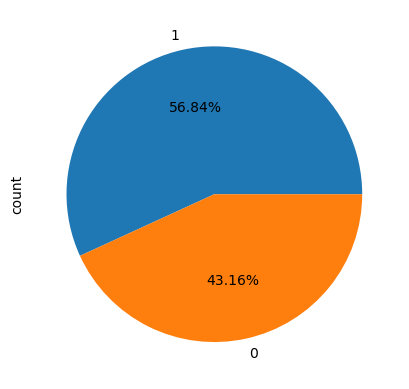

In [13]:
df.Y.value_counts().plot(kind="pie",autopct="%.2F%%")

<Axes: ylabel='count'>

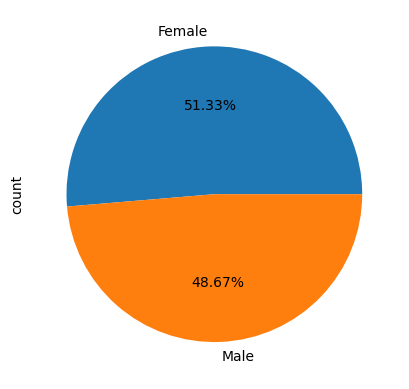

In [14]:
df.gender.value_counts().plot(kind="pie",autopct="%.2F%%")

<Axes: ylabel='count'>

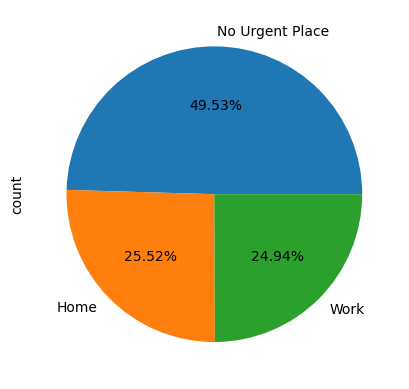

In [15]:
df.destination.value_counts().plot(kind="pie",autopct="%.2F%%")

<Axes: ylabel='count'>

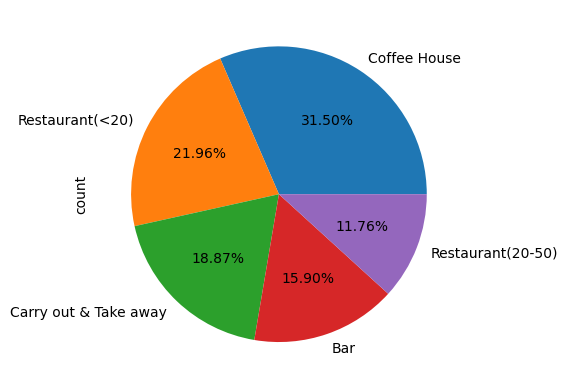

In [16]:
df.coupon.value_counts().plot(kind="pie",autopct="%.2F%%")

<Axes: ylabel='count'>

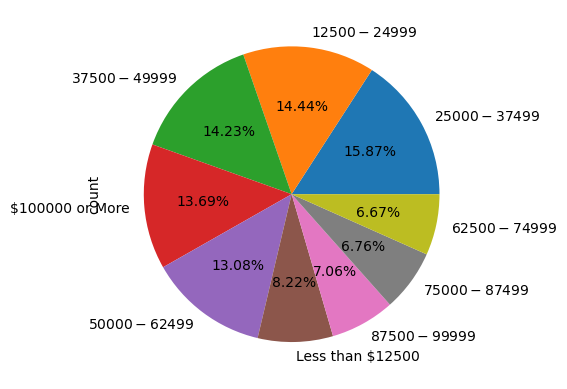

In [17]:
df.income.value_counts().plot(kind="pie",autopct="%.2F%%")

<Axes: ylabel='count'>

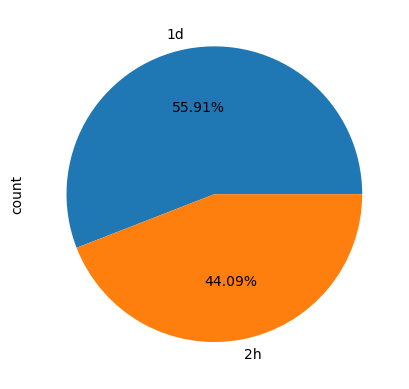

In [18]:
df.expiration.value_counts().plot(kind="pie",autopct="%.2F%%")

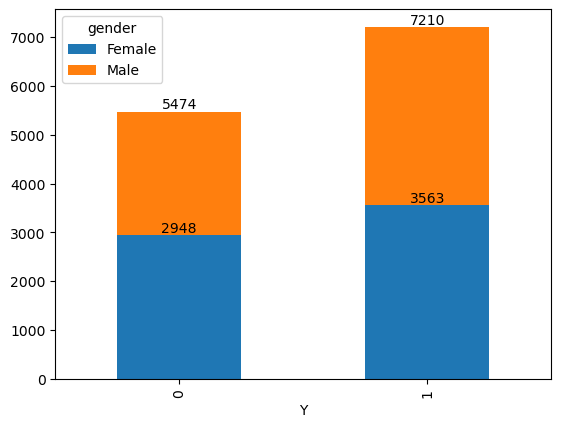

In [19]:
ax=pd.crosstab(df.Y,df.gender).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

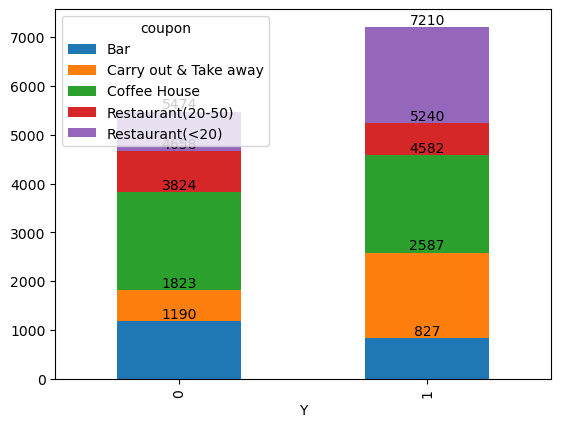

In [20]:
ax=pd.crosstab(df.Y,df.coupon).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

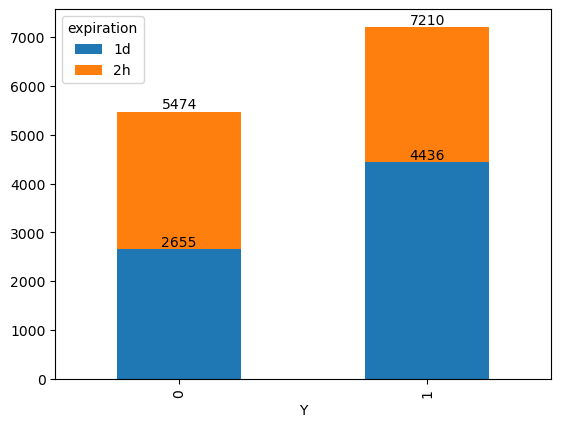

In [21]:
ax=pd.crosstab(df.Y,df.expiration).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

### Hypothesis Testing 

In [22]:
# Test Null No Association Between Y and gender 
# Test Null No Association Between Y and destination
# Test Null No Association Between Y and coupon
# Test Null No Association Between and gender and coupon 
# Test Null No Association Between income and gender

In [23]:
from scipy.stats import chi2_contingency

In [24]:
pd.crosstab(df.Y,df.gender)

gender,Female,Male
Y,,
0,2948,2526
1,3563,3647


In [25]:
chi2_contingency(pd.crosstab(df.Y,df.gender))
# Since pvalue=8.05552865589407e-07 is less than 0.05 , Reject Null
# Null - NO association between both variables

Chi2ContingencyResult(statistic=24.344527038622925, pvalue=8.05552865589407e-07, dof=1, expected_freq=array([[2809.93487859, 2664.06512141],
       [3701.06512141, 3508.93487859]]))

In [26]:
# Test Null No Association Between Y and destination

In [27]:
pd.crosstab(df.Y,df.destination)

destination,Home,No Urgent Place,Work
Y,,,
0,1598,2301,1575
1,1639,3982,1589


In [28]:
chi2_contingency(pd.crosstab(df.Y,df.destination))
# Since pvalue=8.40265678045787e-48 is less than 0.05 , Reject Null
# Null - NO association between both variables

Chi2ContingencyResult(statistic=216.79107304896826, pvalue=8.40265678045787e-48, dof=2, expected_freq=array([[1396.98344371, 2711.53752759, 1365.4790287 ],
       [1840.01655629, 3571.46247241, 1798.5209713 ]]))

In [29]:
# Test Null No Association Between Y and coupon

In [30]:
pd.crosstab(df.Y,df.coupon)

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
Y,,,,,
0,1190,633,2001,834,816
1,827,1760,1995,658,1970


In [31]:
chi2_contingency(pd.crosstab(df.Y,df.coupon))
# Since pvalue=8.575341747082738e-188 is less than 0.05 , Reject Null
# Null - NO association between both variables

Chi2ContingencyResult(statistic=873.6378240374827, pvalue=8.575341747082738e-188, dof=4, expected_freq=array([[ 870.47130243, 1032.7406181 , 1724.54304636,  643.89845475,
        1202.34657837],
       [1146.52869757, 1360.2593819 , 2271.45695364,  848.10154525,
        1583.65342163]]))

In [32]:
# Test Null No Association Between and gender and coupon

In [33]:
pd.crosstab(df.gender,df.coupon)

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
gender,,,,,
Female,1045,1240,2051,754,1421
Male,972,1153,1945,738,1365


In [34]:
chi2_contingency(pd.crosstab(df.gender,df.coupon))
# Since pvalue=0.9234468480222715 is less than 0.05 , Reject Null
# Null - NO association between both variables

Chi2ContingencyResult(statistic=0.9077464226449882, pvalue=0.9234468480222715, dof=4, expected_freq=array([[1035.37425102, 1228.38402712, 2051.24219489,  765.87921791,
        1430.12030905],
       [ 981.62574898, 1164.61597288, 1944.75780511,  726.12078209,
        1355.87969095]]))

In [35]:
# Test Null No Association Between income and gender

In [36]:
pd.crosstab(df.income,df.gender)

gender,Female,Male
income,,
$100000 or More,757,979
$12500 - $24999,993,838
$25000 - $37499,1282,731
$37500 - $49999,1015,790
$50000 - $62499,722,937
$62500 - $74999,347,499
$75000 - $87499,462,395
$87500 - $99999,379,516
Less than $12500,554,488


In [37]:
chi2_contingency(pd.crosstab(df.income,df.gender))
# Since pvalue=1.6688064349766638e-59 is less than 0.05 , Reject Null
# Null - NO association between both variables

Chi2ContingencyResult(statistic=297.14424631794964, pvalue=1.6688064349766638e-59, dof=8, expected_freq=array([[ 891.13024283,  844.86975717],
       [ 939.89601072,  891.10398928],
       [1033.32095553,  979.67904447],
       [ 926.54959003,  878.45040997],
       [ 851.60430464,  807.39569536],
       [ 434.27199622,  411.72800378],
       [ 439.91855881,  417.08144119],
       [ 459.42486597,  435.57513403],
       [ 534.88347524,  507.11652476]]))

### Spliting data into y and X

In [38]:
X=df.drop("Y",axis=1)

In [39]:
y=df["Y"]

In [40]:
X.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,1,0,0,1


In [41]:
y

0        1
1        0
2        1
3        0
4        0
        ..
12679    1
12680    1
12681    0
12682    0
12683    0
Name: Y, Length: 12684, dtype: int64

### Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [45]:
X=X.astype(str).apply(LabelEncoder().fit_transform)

In [46]:
y=LabelEncoder().fit_transform(y)

In [47]:
X

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,2,1,2,4,0,0,0,3,...,4,4,0,1,0,0,0,0,0,1
1,1,1,2,2,0,2,1,0,0,3,...,4,4,0,1,0,0,0,0,0,1
2,1,1,2,2,0,1,1,0,0,3,...,4,4,0,1,0,0,1,0,0,1
3,1,1,2,2,2,2,1,0,0,3,...,4,4,0,1,0,0,1,0,0,1
4,1,1,2,2,2,2,0,0,0,3,...,4,4,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,1,3,1,0,1,1,2,...,4,4,0,1,0,0,0,0,1,0
12680,2,0,0,1,4,1,0,1,1,2,...,4,4,0,1,0,0,0,0,0,1
12681,2,0,1,0,4,2,0,1,1,2,...,4,4,0,1,0,0,0,0,1,0
12682,2,0,1,0,4,0,0,1,1,2,...,4,4,0,1,0,0,1,1,0,1


In [48]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

### Model Building

### logistic model

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
l=LogisticRegression()

In [51]:
l.fit(X,y)

LogisticRegression()

In [52]:
l.score(X,y) # Model is underfit

0.6295332702617471

### Decision Tree Model

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
d=DecisionTreeClassifier()

In [56]:
d.fit(X,y)

DecisionTreeClassifier()

In [57]:
d.score(X,y)

0.9981866918953012

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
cross_val_score(d,X,y)

array([0.61529365, 0.62081198, 0.599527  , 0.59519117, 0.59700315])

In [60]:
np.mean(cross_val_score(d,X,y))

0.6011500144859238

In [61]:
d1=DecisionTreeClassifier(max_depth=8)

In [62]:
d1.fit(X,y)

DecisionTreeClassifier(max_depth=8)

In [63]:
d1.score(X,y)

0.7444812362030905

### Random Forest 

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
r=RandomForestClassifier(n_estimators=1000,max_depth=8)

In [67]:
r.fit(X,y)

RandomForestClassifier(max_depth=8, n_estimators=1000)

In [68]:
r.score(X,y)

0.7570955534531694

In [69]:
cross_val_score(r,X,y)

array([0.68072527, 0.68939693, 0.67481277, 0.67087111, 0.69873817])

In [88]:
np.mean(cross_val_score(r,X,y))

0.6807012368367718

### Gradiant Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
g=GradientBoostingClassifier(n_estimators=1000,max_depth=8)

In [91]:
g.fit(X,y)

GradientBoostingClassifier(max_depth=8, n_estimators=1000)

In [75]:
g.score(X,y)

0.9981866918953012

### SVC

In [77]:
from sklearn.svm import SVC

In [78]:
s=SVC()

In [79]:
s.fit(X,y)

SVC()

In [80]:
s.score(X,y)

0.6539735099337748

### Prediction

In [92]:
logpredict=l.predict(X)
treepredict=d.predict(X)
RFpredict = r.predict(X)
gbpredict = g.predict(X)
svcpredict = s.predict(X)

In [82]:
from sklearn.metrics import classification_report,RocCurveDisplay

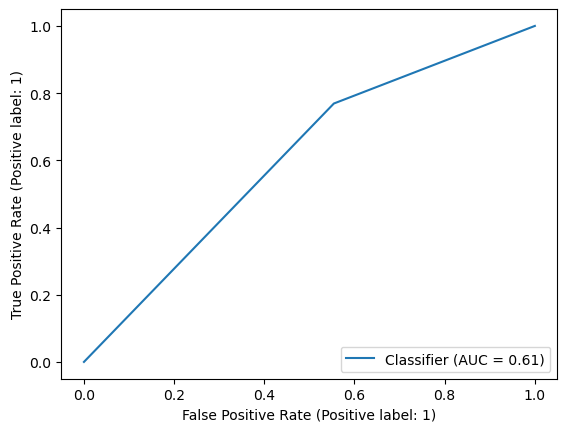

In [83]:
RocCurveDisplay.from_predictions(y,logpredict)

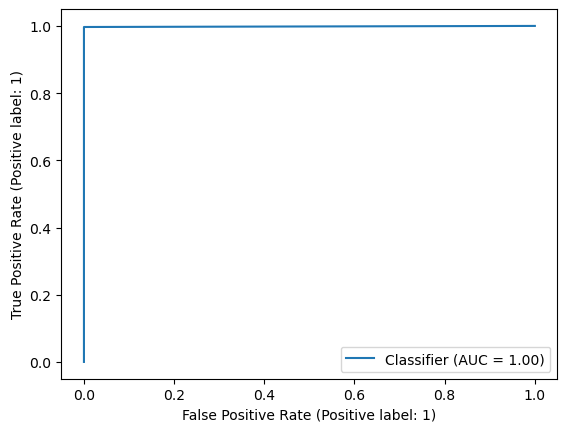

In [84]:
RocCurveDisplay.from_predictions(y,treepredict)

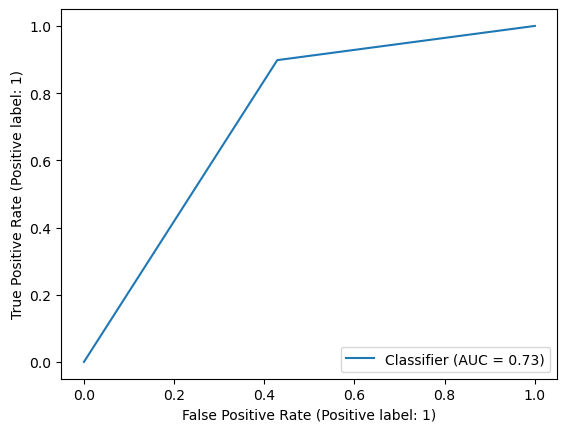

In [85]:
RocCurveDisplay.from_predictions(y,RFpredict)

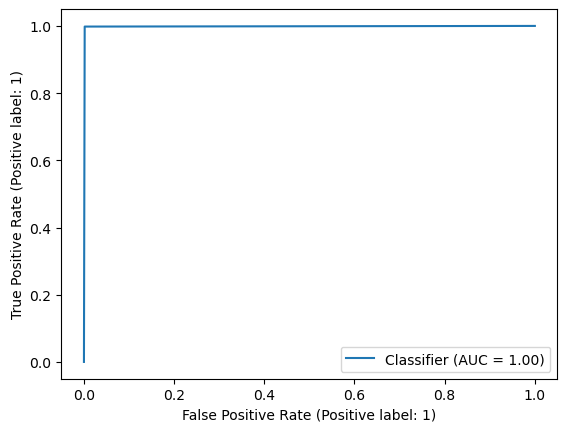

In [86]:
RocCurveDisplay.from_predictions(y,gbpredict)

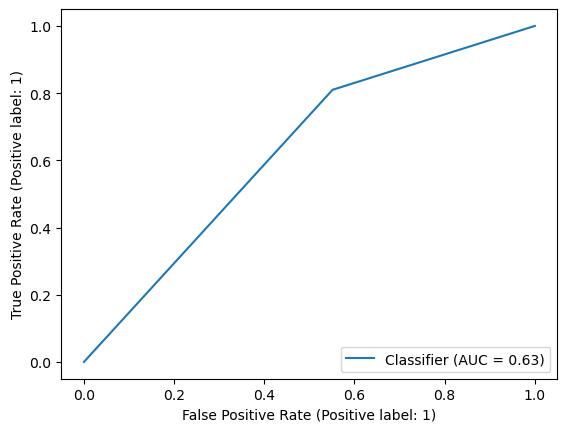

In [87]:
RocCurveDisplay.from_predictions(y,svcpredict)